<a href="https://colab.research.google.com/github/Muhamadsulton/kaggle/blob/main/%D1%86%D0%B5%D0%BD%D0%B0_%D0%B4%D0%BE%D0%BC%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving home_train.csv to home_train (1).csv


In [ ]:
data = pd.read_csv('home_train.csv', header = 0, index_col = False)

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# просмотр размерности массива данных
np.shape(data)

(1460, 81)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(data):
        # Общее количество пропущенных значений
        mis_val = data.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Ваш датафрейм имеет " + str(data.shape[1]) + " колонок.\n"      
            " " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок имееют пропущенные данные.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(data)
missing_values.head(20)

Ваш датафрейм имеет 81 колонок.
 19 колонок имееют пропущенные данные.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [ ]:
#удаляем эти столбцы потому что содержат большое количество пропущенных значений
data = data.drop(['Alley','MiscFeature','PoolQC','FireplaceQu','Fence'], axis = 1)

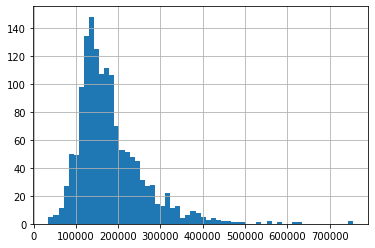

In [ ]:
#строим гистограмму цены продажи наших домов
data['SalePrice'].hist(bins = 60)
plt.show()

In [ ]:
#data["SalePrice"] = np.log1p(data["SalePrice"])

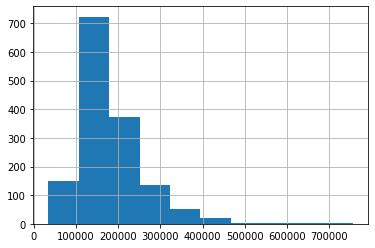

In [ ]:
data['SalePrice'].hist()

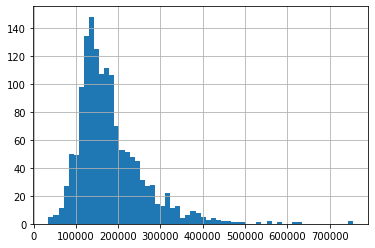

In [ ]:
#строим гистограмму цены продажи наших домов
data['SalePrice'].hist(bins = 60)
plt.show()

In [ ]:
#тест на нормальность Шапиро - Вилка
from scipy.stats import shapiro
from numpy.random import seed
seed(1)
stat, p = shapiro(data['SalePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# на уровне p - значимости
alpha = 0.05
if p > alpha:
    print('Распределение является нормальным (принимаем гипотезу H0)')
else:
    print('Распределение не явлется нормальным (отклоняем гипотезу H0)')

Statistics=0.870, p=0.000
Распределение не явлется нормальным (отклоняем гипотезу H0)


Text(0.5, 0.98, '')

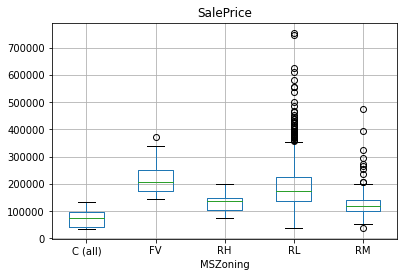

In [ ]:
#строим ящик с усиками по переменной расположения домов и их ценнами
#видно что самые дешевые дома расположены возле Commercial  - C
ax = data.boxplot(column = 'SalePrice', by = 'MSZoning')
ax.get_figure().suptitle('')

In [ ]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

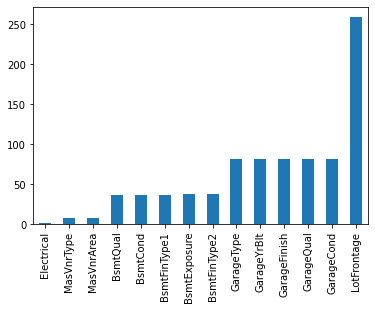

In [ ]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar();

In [ ]:
data['Electrical'].mode()

0    SBrkr
dtype: object

In [ ]:
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [ ]:
data = data.drop(['MasVnrType'],axis=1)

In [ ]:
data['MasVnrArea'].mode()

0    0.0
dtype: float64

In [ ]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)

In [ ]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
data['BsmtQual'] = data['BsmtQual'].fillna('TA')

In [ ]:
data['BsmtCond'] = data['BsmtCond'].fillna('TA')

In [ ]:
data['BsmtFinType1'].mode()

0    Unf
dtype: object

In [ ]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('Unf')

In [ ]:
data['BsmtFinType2'].mode()

0    Unf
dtype: object

In [ ]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('Unf')

In [ ]:
data['BsmtExposure'].mode()

0    No
dtype: object

In [ ]:
data['BsmtExposure'] = data['BsmtExposure'].fillna('NO')

In [ ]:
data['GarageType'].mode()

0    Attchd
dtype: object

In [ ]:
data['GarageType'] = data['GarageType'].fillna('Attchd')

In [ ]:
data['GarageYrBlt'].median()

1980.0

In [ ]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(1980.0)

In [ ]:
data['GarageFinish'].mode()

0    Unf
dtype: object

In [ ]:
data['GarageFinish'] = data['GarageFinish'].fillna('Unf')

In [ ]:
data['GarageCond'].mode()

0    TA
dtype: object

In [ ]:
data['GarageCond'] = data['GarageCond'].fillna('TA')

In [ ]:
data['GarageQual'].mode()

0    TA
dtype: object

In [ ]:
data['GarageQual'] = data['GarageQual'].fillna('TA')

In [ ]:
data['LotFrontage'].median()

69.0

In [ ]:
data['LotFrontage'] =data['LotFrontage'].fillna(69.0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Создаем объект label encoder для преоброзования категориальных признаков в числовые
le = LabelEncoder()
le_count = 0
# Проходим по всем столбцам
for col in data:
    if data[col].dtype == 'object':
        # Если признак имеет 12 или менее уникальных значения
        if len(list(data[col].unique())) <= 12:
            # Обучаем LabelEncoder на тренировочных данных
            le.fit(data[col])
            # Трансформируем обучающий и тестовый датафреймы
            data[col] = le.transform(data[col])
            #data_test[col] = le.transform(data_test[col])
            
            # Подсчитываем, сколько признаков обработано методом LabelEncoder
            le_count += 1
print('%d колонок было преобразовано.' % le_count)

34 колонок было преобразовано.


In [ ]:
data = pd.get_dummies(data)

In [ ]:
print('Тренировочные данные имеют размерность: ', data.shape)

Тренировочные данные имеют размерность:  (1460, 128)


In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1,60,3,65.0,8450,1,3,3,0,4,0,2,2,0,5,7,5,2003,2003,1,1,196.0,2,4,2,2,3,4,2,706,5,0,150,856,1,0,1,4,856,854,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,20,3,80.0,9600,1,3,3,0,2,0,1,2,0,2,6,8,1976,1976,1,1,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,60,3,68.0,11250,1,0,3,0,4,0,2,2,0,5,7,5,2001,2002,1,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,70,3,60.0,9550,1,0,3,0,0,0,2,2,0,5,7,5,1915,1970,1,1,0.0,3,4,0,3,1,4,0,216,5,0,540,756,1,2,1,4,961,756,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,60,3,84.0,14260,1,0,3,0,2,0,2,2,0,5,8,5,2000,2000,1,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Найдем корреляцию признаков с целевой меткой и отсортируем результат
correlations = data.corr()['SalePrice'].sort_values()
# Отобразим результат вычислений
print('Положительная корреляция:\n', correlations.tail(20))
print('\n Отрицательная корреляция:\n', correlations.head(20))

Положительная корреляция:
 WoodDeckSF              0.324413
Neighborhood_NoRidge    0.330424
LotFrontage             0.334771
Foundation              0.382479
BsmtFinSF1              0.386420
Neighborhood_NridgHt    0.402149
GarageYrBlt             0.466754
Fireplaces              0.466929
MasVnrArea              0.472614
YearRemodAdd            0.507101
YearBuilt               0.522897
TotRmsAbvGrd            0.533723
FullBath                0.560664
1stFlrSF                0.605852
TotalBsmtSF             0.613581
GarageArea              0.623431
GarageCars              0.640409
GrLivArea               0.708624
OverallQual             0.790982
SalePrice               1.000000
Name: SalePrice, dtype: float64

 Отрицательная корреляция:
 ExterQual              -0.636884
BsmtQual               -0.618025
KitchenQual            -0.589189
GarageFinish           -0.537242
HeatingQC              -0.400178
GarageType             -0.302105
BsmtExposure           -0.294589
LotShape             

In [ ]:
#берем корреляцию столбцов по модулю
data_corr1 = data.corr()['SalePrice'].abs()

In [ ]:
#ставим ограничения, если корреляиция меньше 0.4 то отбрасываем ее
df = data_corr1.where(data_corr1 > 0.5)

In [ ]:
#удаляем значения корреляций у которых меньше 0.5
df = df.dropna()

In [ ]:
df

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual       0.636884
BsmtQual        0.618025
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual     0.589189
TotRmsAbvGrd    0.533723
GarageFinish    0.537242
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

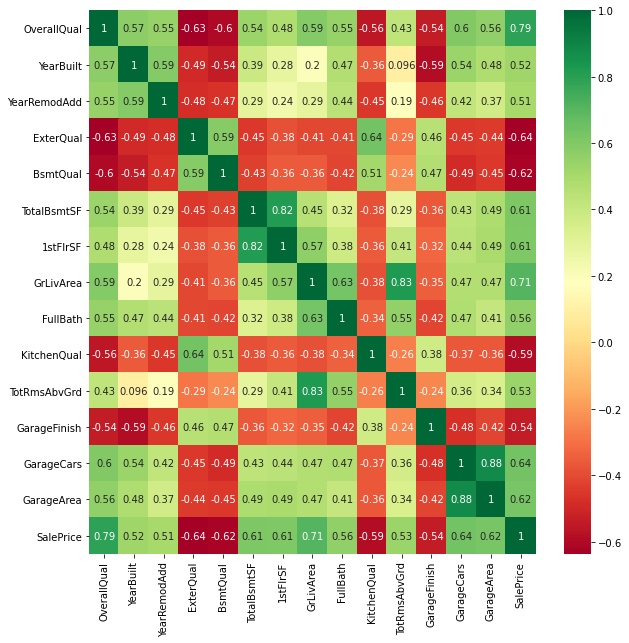

In [ ]:
import seaborn as sns
corr = data.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
tt = data[['TotalBsmtSF','TotRmsAbvGrd','YearBuilt','FullBath','1stFlrSF','GarageCars',
           'GrLivArea','OverallQual','ExterQual','KitchenQual','SalePrice']]

In [ ]:
#строим новый фрейм данных по которому будет осуществляться построенния регрессионых моделей
#train = data[['MasVnrArea','OverallQual','YearBuilt','ExterQual','BsmtQual','1stFlrSF','GrLivArea','FullBath',
             #'KitchenQual','TotRmsAbvGrd','GarageCars','SalePrice']]

In [ ]:
tt.head()

,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,FullBath,1stFlrSF,GarageCars,GrLivArea,OverallQual,ExterQual,KitchenQual,SalePrice
0,856,8,2003,2,856,2,1710,7,2,2,208500
1,1262,6,1976,2,1262,2,1262,6,3,3,181500
2,920,6,2001,2,920,2,1786,7,2,2,223500
3,756,7,1915,1,961,3,1717,7,3,2,140000
4,1145,9,2000,2,1145,3,2198,8,2,2,250000


In [ ]:
#train.shape

In [ ]:
X = tt.drop(['SalePrice'], axis=1)
y = tt['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#стандартизация признаков
standard = StandardScaler()

In [ ]:
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.fit_transform(X_test)

In [ ]:
dummy = DummyRegressor(strategy = 'mean')

In [ ]:
dummy.fit(X_train_scaled,y_train)
dummy.score(X_test_scaled,y_test)

-0.0014293725084049136

ЛИНЕЙНАЯ РЕГРЕССИЯ

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_linear = linear.predict(X_test_scaled)

In [ ]:
linear.score(X_test_scaled,y_test)

0.8192843026212415

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline

КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс - валидация
cross_lin = cross_val_score(linear,X,y,cv = 10,scoring = 'r2', n_jobs = -1)

In [ ]:
cross_lin.mean()

0.7869140503201899

In [ ]:
kf_lin = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_lin = cross_val_score(linear,X,y,cv = kf_lin,scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_lin.mean()

0.7748023268477883

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ

In [ ]:
#полиномиальная регрессия
poly = PolynomialFeatures(degree = 2)

In [ ]:
X_poly = poly.fit_transform(X)

In [ ]:
poly_reg = LinearRegression()

In [ ]:
# полиномиальная регрессия 
poly_reg.fit(X_poly, y)
poly_pred = poly_reg.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y,poly_pred))
r2 = r2_score(y,poly_pred)
print(rmse)
print(r2)

28584.871790740664
0.8704420032104458


КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс - валидация полиномиальной регресии 
cross_poly = cross_val_score(poly_reg,X,y,scoring = 'r2')

In [ ]:
cross_poly.mean()

0.7792112294517486

In [ ]:
kf_poly = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_poly = cross_val_score(poly_reg,X,y,cv = kf_poly,scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_poly.mean()

0.7748023268477883

ДЕРЕВЬЯ РЕШЕНИЙ

In [ ]:
#регрессия дерева принятия решения
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=2,criterion='mse',random_state = 241)
tree_model = tree.fit(X_train,y_train)
pred_tree = tree_model.predict(X_test_scaled)

In [ ]:
#для деревья регрессии
print(tree.score(X_test, y_test))

0.8113457192091332


КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс валидация на дереве регрессии
cross_tree = cross_val_score(tree, X, y, cv=10,scoring = "r2", n_jobs = -1)

In [ ]:
cross_tree.mean()

0.7966809617155556

In [ ]:
#к- блочная кросс - валидация на дереве регрессии 
#pipline_clf = make_pipeline(standard,tree)
kf_tree = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_tree = cross_val_score(tree,X,y,cv = kf_tree,scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_tree.mean()

0.7862529597222316

СЛУЧАЙНЫЕ ЛЕСА

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomforest = RandomForestRegressor(max_depth=10,min_samples_leaf=4,min_samples_split=2,criterion='mse', random_state = 241, n_jobs = -1)
model = randomforest.fit(X_train_scaled,y_train) 

In [ ]:
#для случайного леса регрессии 
print(randomforest.score(X_test_scaled, y_test))

0.8574255527781995


КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс валидация для случайного леса
cross_randmf = cross_val_score(randomforest, X,y, cv=10,scoring = "r2", n_jobs = -1)

In [ ]:
cross_randmf.mean()

0.8351654044218293

In [ ]:
#k-блочная перекрестная проверка на случайном лесе
pipline_randmf = make_pipeline(standard, randomforest)
kf_randmf = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_randmf = cross_val_score(pipline_randmf,X,y,cv = kf_randmf, scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_randmf.mean()

0.8343767647280205

БЛИЖАЙШИЕ СОСЕДИ

In [ ]:
# К-ближайших соседей регрессия
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg_knn = KNeighborsRegressor(n_neighbors=4)

In [ ]:
knn = reg_knn.fit(X_train_scaled, y_train)
print(knn.score(X_test_scaled, y_test))

0.8437540508501851


КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс валидация для k ближайших соседей
cross_knn = cross_val_score(reg_knn, X, y, cv=10,scoring = "r2", n_jobs = -1)

In [ ]:
cross_knn.mean()

0.6689235188679501

In [ ]:
cross_knn

array([0.61206986, 0.67462291, 0.81430952, 0.54197803, 0.76805026,
       0.67576066, 0.68936988, 0.73095549, 0.4866887 , 0.69542987])

In [ ]:
#k-блочная перекрестная проверка
pipline_knn = make_pipeline(standard,reg_knn )
kf_knn = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_knn = cross_val_score(pipline_randmf,X,y,cv = kf_knn, scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_knn.mean()

0.8425262199747412

ГРАДИЕНТНЫЙ БУСТИНГ

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
gb = GradientBoostingRegressor(n_estimators=300,max_depth=6,min_samples_leaf=3, min_impurity_split=5)

In [ ]:
model_gb = gb.fit(X_train_scaled,y_train)

In [ ]:
print(model_gb.score(X_test_scaled,y_test))

0.8576581790620508


КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс валидация для k ближайших соседей
cross_gb = cross_val_score(gb, X, y, cv=10,scoring = "r2", n_jobs = -1)

In [ ]:
cross_gb.mean()

0.8384402140142097

In [ ]:
#k-блочная перекрестная проверка
#pipline_knn = make_pipeline(standard,reg_knn )
kf_gb = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_gb = cross_val_score(gb,X,y,cv = kf_knn, scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_knn.mean()

0.8425262199747412

ADABOOST REGRESSOR

In [ ]:
adaboost = AdaBoostRegressor()

In [ ]:
model_adaboost = adaboost.fit(X_train_scaled,y_train)

In [ ]:
print(model_adaboost.score(X_test_scaled,y_test))

0.8361283996231316


КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
cross_adaboost = cross_val_score(gb, X, y, cv=10,scoring = "r2", n_jobs = -1)

In [ ]:
cross_adaboost.mean()

0.8537894243247376

In [ ]:
#k-блочная перекрестная проверка
#pipline_knn = make_pipeline(standard,reg_knn )
kf_adaboost = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_adaboost = cross_val_score(adaboost,X,y,cv = kf_knn, scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_adaboost.mean()

0.7904590267814454

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso = Lasso(alpha=0.5)

In [ ]:
model_lasso = lasso.fit(X_train_scaled,y_train)

In [ ]:
print(model_lasso.score(X_test_scaled,y_test))

0.8192835171870769


In [ ]:
ridge = Ridge(alpha=0.5)

In [ ]:
model_ridge = ridge.fit(X_train_scaled,y_train)

In [ ]:
print(model_ridge.score(X_test_scaled,y_test))

0.8192732999133131


In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet()

In [ ]:
model_elastic = elastic.fit(X_train_scaled,y_train)

In [ ]:
print(model_elastic.score(X_test_scaled,y_test))

0.796441838615838


ПОДБОР ГИППЕРПАРМЕТРОВ ДЛЯ МОДЕЛЕЙ

In [ ]:
from sklearn.model_selection import GridSearchCV

БЛИЖАЙШИЕ СОСЕДИ

In [ ]:
n_neighbors = range(1,22)
params_knn = {'n_neighbors':n_neighbors}

In [ ]:
grid_knn = GridSearchCV(knn,params_knn,scoring='r2',cv=5,verbose=1,n_jobs=-1)

In [ ]:
best_model_knn = grid_knn.fit(X_test_scaled,y_test)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.3s finished


In [ ]:
best_model_knn.best_params_

{'n_neighbors': 4}

Деревья решений

In [ ]:
params_tree = {
    'max_depth' : range(1,21),
    'min_samples_split': range(2,11),
    'min_samples_leaf':range(2,11)
}

In [ ]:
grid_tree = GridSearchCV(tree,params_tree,scoring='r2',cv=5,verbose=1,n_jobs=-1)

In [ ]:
best_model_tree = grid_tree.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:   27.1s finished


In [ ]:
best_model_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

СЛУЧАЙНЫЕ ЛЕСА

In [ ]:
params_rfc = {
    'max_depth' : range(1,15),
    'min_samples_split': range(2,7),
    'min_samples_leaf':range(2,11)
}

In [ ]:
grid_rfc = GridSearchCV(randomforest,params_rfc,scoring='r2',cv=5,verbose=1,n_jobs=-1)

In [ ]:
best_model_rfc = grid_rfc.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed: 13.6min finished


In [ ]:
best_model_rfc.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
params_gb = {
    'n_estimators':[300,500,700],
    'max_depth' : range(1,15),
    'min_samples_split': range(2,10),
    'min_samples_leaf' : range(2,7),
}

In [ ]:
grid_gb = GridSearchCV(gb,params_gb,scoring='r2',cv=5,verbose=1,n_jobs=-1)

In [ ]:
best_model_gb = grid_gb.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 88.8min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 119.7min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed: 156.5min finished


In [ ]:
best_model_gb.best_params_

{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving home_test.csv to home_test (1).csv


In [ ]:
te = pd.read_csv('home_test.csv')

In [ ]:
te

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(test):
        # Общее количество пропущенных значений
        mis_val = test.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * test.isnull().sum() / len(test)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Ваш датафрейм имеет " + str(data.shape[1]) + " колонок.\n"      
            " " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок имееют пропущенные данные.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(test)
missing_values.head(15)

NameError: ignored

In [ ]:
test = te[['TotalBsmtSF','TotRmsAbvGrd','YearBuilt','FullBath','1stFlrSF','GarageCars',
           'GrLivArea','OverallQual','ExterQual','KitchenQual']]

In [ ]:
X_train.head()

,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,FullBath,1stFlrSF,GarageCars,GrLivArea,OverallQual,ExterQual,KitchenQual
1023,1346,7,2005,2,1504,2,1504,7,2,2
810,1040,5,1974,1,1309,2,1309,6,3,2
1384,560,6,1939,1,698,1,1258,6,3,3
626,978,6,1960,1,1422,1,1422,5,3,3
813,1442,7,1958,1,1442,1,1442,6,3,3


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalBsmtSF   1458 non-null   float64
 1   TotRmsAbvGrd  1459 non-null   int64  
 2   YearBuilt     1459 non-null   int64  
 3   FullBath      1459 non-null   int64  
 4   1stFlrSF      1459 non-null   int64  
 5   GarageCars    1458 non-null   float64
 6   GrLivArea     1459 non-null   int64  
 7   OverallQual   1459 non-null   int64  
 8   ExterQual     1459 non-null   object 
 9   KitchenQual   1458 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 114.1+ KB


In [ ]:
test['KitchenQual'].mode()

0    TA
dtype: object

In [ ]:
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

In [ ]:
test['GarageCars'].mode()

0    2.0
dtype: float64

In [ ]:
test['GarageCars'] = test['GarageCars'].fillna(2.0)

In [ ]:
#test['MasVnrArea'].median()

0.0

In [ ]:
#test['MasVnrArea'] = test['MasVnrArea'].fillna(0.0)

In [ ]:
test['TotalBsmtSF'].median()

988.0

In [ ]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(988.0)

In [ ]:
# Создаем объект label encoder для преоброзования категориальных признаков в числовые
le = LabelEncoder()
le_count = 0
# Проходим по всем столбцам
for col in test:
    if test[col].dtype == 'object':
        # Если признак имеет 12 или менее уникальных значения
        if len(list(test[col].unique())) <= 12:
            # Обучаем LabelEncoder на тренировочных данных
            le.fit(test[col])
            # Трансформируем обучающий и тестовый датафреймы
            test[col] = le.transform(test[col])
            #data_test[col] = le.transform(data_test[col])
            
            # Подсчитываем, сколько признаков обработано методом LabelEncoder
            le_count += 1
print('%d колонок было преобразовано.' % le_count)

2 колонок было преобразовано.


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalBsmtSF   1459 non-null   float64
 1   TotRmsAbvGrd  1459 non-null   int64  
 2   YearBuilt     1459 non-null   int64  
 3   FullBath      1459 non-null   int64  
 4   1stFlrSF      1459 non-null   int64  
 5   GarageCars    1459 non-null   float64
 6   GrLivArea     1459 non-null   int64  
 7   OverallQual   1459 non-null   int64  
 8   ExterQual     1459 non-null   int64  
 9   KitchenQual   1459 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 114.1 KB


In [ ]:
test_poly = poly.fit_transform(test)

In [ ]:
final_pred = poly_reg.predict(test_poly)

In [ ]:
predict = pd.DataFrame(final_pred)

In [ ]:
predict

,0
0,117837.241040
1,168174.469613
2,174663.745038
3,183172.903911
4,202968.167404
...,...
1454,98302.898668
1455,106292.004175
1456,144122.147442
1457,115826.687748


In [ ]:
pred_gb = gb.predict(test)

In [ ]:
fin_gb = pd.DataFrame(pred_gb)

In [ ]:
fin_gb

,0
0,340970.326592
1,340970.326592
2,329806.054588
3,329806.054588
4,329806.054588
...,...
1454,183672.698734
1455,340970.326592
1456,340970.326592
1457,183672.698734


In [ ]:
from google.colab import files
uploaded = files.download('Home_price.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>